In [5]:
# Import libraries
import pandas as pd
import numpy as np
import pingouin as pg 
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

from matplotlib import pyplot
from matplotlib.pyplot import figure

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca

from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from ipywidgets import interact, interact_manual

import warnings
warnings.filterwarnings('ignore') # Suppress warnings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

In [6]:
f = open('data/Dairy_aggregate.xlsx', 'rb').read()
dairy_ag_df = pd.read_excel(f)

In [7]:
dairy_ag_df.dtypes

Year                                                              int64
Member State                                                     object
8 Types of Farming                                               object
14 Types of Farming                                              object
(SE005) Economic size (€'000)                                    object
                                                                 ...   
(SE705) Processing of animals and animals' products (€/farm)     object
(SE710) Processing of crops (€/farm)                             object
(SE730) Other OGA output (€/farm)                                object
(SYS02) Farms represented (nb)                                  float64
(SYS03) Sample farms                                             object
Length: 183, dtype: object

In [8]:
def replace_missing_str(df):
    for column in df.columns.tolist():
        df[column] = df[column].apply(lambda value: value.replace('-', '---') if value == '-' else value)
        df[column] = df[column].replace('---', np.nan)
        try:
            if df[column].dtype == 'object':
                df[column] = df[column].astype(float)
        except Exception as e:
            print(e)

replace_missing_str(dairy_ag_df)
dairy_ag_df.dtypes

dairy_ag_df['Year'] = dairy_ag_df['Year'].astype(int)

could not convert string to float: 'EU-28'
could not convert string to float: '(5) Milk'
could not convert string to float: '(45) Specialist milk'
could not convert string to float: '10000 - <20000'


Year                                                              int64
Member State                                                     object
8 Types of Farming                                               object
14 Types of Farming                                              object
(SE005) Economic size (€'000)                                   float64
                                                                 ...   
(SE705) Processing of animals and animals' products (€/farm)    float64
(SE710) Processing of crops (€/farm)                            float64
(SE730) Other OGA output (€/farm)                               float64
(SYS02) Farms represented (nb)                                  float64
(SYS03) Sample farms                                             object
Length: 183, dtype: object

In [9]:
dairy_ag_df.describe()

,Year,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE035) Cereals (ha),(SE041) Other field crops (ha),(SE042) Energy crops (ha),(SE046) Vegetables and flowers (ha),(SE050) Vineyards (ha),(SE054) Permanent crops (ha),(SE055) Orchards (ha),(SE060) Olive groves (ha),(SE065) Other permanent crops (ha),(SE071) Forage crops (ha),(SE072) Agricultural fallows (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE075) Woodland area (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE090) Other cattle (LU),(SE095) Sheep and goats (LU),(SE100) Pigs (LU),(SE105) Poultry (LU),(SE110) Yield of wheat (q/ha),(SE115) Yield of maize (q/ha),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE135) Total output crops & crop production (€/farm),(SE136) Total crops output (€/ha),(SE140) Cereals (€/farm),(SE145) Protein crops (€/farm),(SE146) Energy crops (€),(SE150) Potatoes (€/farm),(SE155) Sugar beet (€/farm),(SE160) Oil-seed crops (€/farm),(SE165) Industrial crops (€/farm),(SE170) Vegetables & flowers (€/farm),(SE175) Fruit (excl. Citrus and grapes) (€/farm),(SE180) Citrus fruit (€/farm),(SE185) Wine and grapes (€/farm),(SE190) Olives & olive oil (€/farm),(SE195) Forage crops (€/farm),(SE200) Other crop output (€/farm),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE220) Beef and veal (€/farm),(SE225) Pigmeat (€/farm),(SE022) Share of OGA work /AWU (%),(SE230) Sheep and goats (€/farm),(SE235) Poultrymeat (€/farm),(SE240) Eggs (€/farm),(SE245) Ewes' and goats' milk (€/farm),(SE251) Other livestock & products (€/farm),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE284) Specific crop costs (€/ha),(SE285) Seeds and plants (€),(SE290) Seeds and plants home-grown (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE300) Crop protection (€),(SE305) Other crop specific costs (€),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE320) Feed for pigs & poultry (€),(SE325) Feed for pigs&poultry home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE331) Forestry specific costs (€),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed assets (€),"(SE446) Land, permanent crops & quotas (€)

In [10]:
dairy_ag_df.head(5)

,Year,Member State,8 Types of Farming,14 Types of Farming,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE035) Cereals (ha),(SE041) Other field crops (ha),(SE042) Energy crops (ha),(SE046) Vegetables and flowers (ha),(SE050) Vineyards (ha),(SE054) Permanent crops (ha),(SE055) Orchards (ha),(SE060) Olive groves (ha),(SE065) Other permanent crops (ha),(SE071) Forage crops (ha),(SE072) Agricultural fallows (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE075) Woodland area (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE090) Other cattle (LU),(SE095) Sheep and goats (LU),(SE100) Pigs (LU),(SE105) Poultry (LU),(SE110) Yield of wheat (q/ha),(SE115) Yield of maize (q/ha),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE135) Total output crops & crop production (€/farm),(SE136) Total crops output (€/ha),(SE140) Cereals (€/farm),(SE145) Protein crops (€/farm),(SE146) Energy crops (€),(SE150) Potatoes (€/farm),(SE155) Sugar beet (€/farm),(SE160) Oil-seed crops (€/farm),(SE165) Industrial crops (€/farm),(SE170) Vegetables & flowers (€/farm),(SE175) Fruit (excl. Citrus and grapes) (€/farm),(SE180) Citrus fruit (€/farm),(SE185) Wine and grapes (€/farm),(SE190) Olives & olive oil (€/farm),(SE195) Forage crops (€/farm),(SE200) Other crop output (€/farm),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE220) Beef and veal (€/farm),(SE225) Pigmeat (€/farm),(SE022) Share of OGA work /AWU (%),(SE230) Sheep and goats (€/farm),(SE235) Poultrymeat (€/farm),(SE240) Eggs (€/farm),(SE245) Ewes' and goats' milk (€/farm),(SE251) Other livestock & products (€/farm),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE284) Specific crop costs (€/ha),(SE285) Seeds and plants (€),(SE290) Seeds and plants home-grown (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE300) Crop protection (€),(SE305) Other crop specific costs (€),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE320) Feed for pigs & poultry (€),(SE325) Feed for pigs&poultry home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE331) Forestry specific costs (€),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed as

In [11]:
# Doing it this way so I can add more columns later and this will skip the columns that were already dropped.

dairy_ag_df = dairy_ag_df[[
        'Year',
        'Member State',
        "(SE005) Economic size (€'000)",
        '(SE010) Total labour input (AWU)',
        '(SE011) Labour input (hrs)',
        '(SE015) Unpaid labour input (AWU)',
        '(SE016) Unpaid labour input (hrs)',
        '(SE020) Paid labour input (AWU)',
        '(SE021) Paid labour Input (hrs)',
        '(SE025) Total Utilised Agricultural Area (ha)',
        '(SE026) Arable land (ha)',
        '(SE027) Permanent crops (ha)',
        '(SE028) Permanent grassland (ha)',
        '(SE030) Rented UAA (ha)',
        '(SE073) Set aside (ha)',
        '(SE074) Total agricultural area out of production (ha)',
        '(SE080) Total livestock units (LU)',
        '(SE085) Dairy cows (LU)',
        '(SE086) Cattle dairy cows (LU)',
        '(SE087) Buffalo dairy cows (LU)',
        '(SE120) Stocking density (LU/ha)',
        '(SE125) Milk yield (kg/cow)',
        '(SE126) Milk yield cattle dairy cows (kg/cow)',
        '(SE127) Milk yield buffalo dairy cows (kg/cow)',
        '(SE131) Total output (€/farm)',
        '(SE132) Total output / Total input (ratio)',
        '(SE206) Total output livestock & livestock products (€/farm)',
        '(SE207) Total livestock output (€/LU)',
        '(SE211) Change in value of livestock (€)',
        "(SE216) Cows' milk & milk products (€/farm)",
        '(SE022) Share of OGA work /AWU (%)',
        '(SE256) Other output (€/farm)',
        '(SE260) Farmhouse consumption (€)',
        '(SE265) Farm use (€)',
        '(SE270) Total Inputs (€)',
        '(SE275) Total intermediate consumption (€)',
        '(SE281) Total specific costs (€)',
        '(SE295) Fertilisers (€)',
        '(SE296) Fertiliser N (q)',
        '(SE297) Fertiliser P2O5 (q)',
        '(SE298) Fertiliser K2O (q)',
        '(SE309) Specific livestock costs (€/LU)',
        '(SE310) Feed for grazing livestock (€)',
        '(SE315) Feed for grazing livestock home-grown (€)',
        '(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm)',
        '(SE336) Total farming overheads (€)',
        '(SE340) Machinery & building current costs (€)',
        '(SE345) Energy (€)',
        '(SE350) Contract work (€)',
        '(SE356) Other direct inputs (€)',
        '(SE360) Depreciation (€)',
        '(SE365) Total external factors (€)',
        '(SE370) Wages paid (€)',
        '(SE375) Rent paid (€)',
        '(SE380) Interest paid (€)',
        '(SE381) Balance of interest paid and received (€)',
        '(SE390) Taxes (€)',
        '(SE395) VAT balance excluding on investments (€)',
        '(SE405) Balance subsidies & taxes on investments (€)',
        '(SE406) Subsidies on investments (€)',
        '(SE407) Payments to dairy outgoers (€)',
        '(SE408) VAT balance on investments (€)',
        '(SE409) Subsidies on agricultural investments (€)',
        '(SE410) Gross Farm Income (€)',
        '(SE415) Farm Net Value Added (€)',
        '(SE420) Farm Net Income (€)',
        '(SE425) Farm Net Value Added (€/AWU)',
        '(SE430) Family Farm Income (€/FWU)',
        '(SE436) Total assets (€)',
        '(SE437) Total assets, opening valuation (€)',
        '(SE441) Total fixed assets (€)',
        '(SE446) Land, permanent crops & quotas (€)',
        '(SE450) Buildings (€)',
        '(SE455) Machinery and equipment (€)',
        '(SE460) Breeding livestock (€)',
        '(SE465) Total current assets (€)',
        '(SE470) Non-breeding livestock (€)',
        '(SE475) Stock of agricultural products (€)',
        '(SE476) Inventories (€)',
        '(SE480) Other circulating capital (€)',
        '(SE485) Total liabilities (€)',
        '(SE490) Long & medium-term loans (€)',
        '(SE495) Short-term loans (€)',
        '(SE501) Net worth (€)',
        '(SE506) Change in net worth (€)',
        '(SE510) Average farm capital (€)',
        '(SE516) Gross Investment on fixed assets (€)',
        '(SE521) Net Investment on fixed assets (€)',
        '(SE526) Cash Flow 1 (€)',
        '(SE530) Cash Flow 2 (€)',
        '(SE532) Cash flow / farm total capital (€)',
        '(SE600) Balance current subsidies & taxes (€)',
        '(SE605) Total subsidies - excluding on investments (€)',
        '(SE606) Total direct payments (€)',
        '(SE611) Compensatory payments/area payments (€)',
        '(SE612) Set aside premiums (€)',
        '(SE615) Total subsidies on livestock (€)',
        '(SE616) Subsidies dairying (€)',
        '(SE618) Subsidies sheep & goats (€)',
        '(SE621) Environmental subsidies (€)',
        '(SE622) LFA subsidies (€)',
        '(SE623) Other rural development payments (€)',
        '(SE624) Total support for rural development (€)',
        '(SE625) Subsidies on intermediate consumption (€)',
        '(SE626) Subsidies on external factors (€)',
        '(SE630) Decoupled payments (€)',
        '(SE631) Single Farm payment (€)',
        '(SE632) Single Area payment (€)',
        '(SE640) Additional aid (€)',
        '(SE650) Support_Art68 (€)',
        '(SE699) Other subsidies (€)',
        '(SE700) Total OGA output (€/farm)',
        '(SE720) Contractual work services (€)',
        '(SE725) Agritourism (€)',
        '(SE750) Total specific costs for OGA (€)',
        '(SE447) Agricultural land (€/farm)',
        '(SE462) Intangible assets (€/farm)',
        '(SE332) Veterinary expenses (€/farm)',
        '(SE765) Milk processing specific cost (€/farm)',
        "(SE766) Cows' milk processing specific cost (€/farm)",
        "(SE705) Processing of animals and animals' products (€/farm)",
        '(SE730) Other OGA output (€/farm)',
        '(SYS02) Farms represented (nb)',
            ]]

In [12]:
dairy_ag_df = dairy_ag_df[dairy_ag_df['Year'] < 2022] # Dropping because a lot of countries still have not submitted the data for 2022 onwards
dairy_ag_df.tail()

,Year,Member State,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE022) Share of OGA work /AWU (%),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed assets (€),"(SE446) Land, permanent crops & quotas (€)",(SE450) Buildings (€),(SE455) Machinery and equipment (€),(SE460) Breeding livestock (€),(SE465) Total current assets (€),(SE470) Non-breeding livestock (€),(SE475) Stock of agricultural products (€),(SE476) Inventories (€),(SE480) Other circulating capital (€),(SE485) Total liabilities (€),(SE490) Long & medium-term loans (€),(SE495) Short-term loans (€),(SE501) Net worth (€),(SE506) Change in net worth (€),(SE510) Average farm capital (€),(SE516) Gross Investment on fixed assets (€),(SE521) Net Investment on fixed assets (€),(SE526) Cash Flow 1 (€),(SE530) Cash Flow 2 (€),(SE532) Cash flow / farm total capital (€),(SE600) Balance current subsidies & taxes (€),(SE605) Total subsidies - excluding on investments (€),(SE606) Total direct payments (€),(SE611) Compensatory payments/area payments (€),(SE612) Set aside premiums (€),(SE615) Total subsidies on livestock (€),(SE616) Subsidies dairying (€),(SE618) Subsidies sheep & goats (€),(SE621) Environmental subsidies (€),(SE622) LFA subsidies (€),(SE623) Other rural development payments (€),(SE624) Total support for rural development (€),(SE625) Subsidies on intermediate consumption (€),(SE626) Subsidies on external factors (€),(SE630) Decoupled payments (€),(SE631) Single Farm payment (€),(SE632) Single Area payment (€),(SE640) Additional aid (€),(SE650) Support_Art68 (€),(SE699) Other subsidies (€),(SE700) Total OGA output (€/farm),(SE720) Contractual work services (€),(SE725) Agritourism (€),(SE750) Total specific costs for OGA (€),(SE447) Agricultura

In [13]:
len(dairy_ag_df.columns.tolist())

123

In [14]:
# Standardise member state names across different datasets
dairy_ag_df = dairy_ag_df[(dairy_ag_df['Member State'] != 'EU27_2020') & (dairy_ag_df['Member State'] != 'EU-28') & (dairy_ag_df['Member State'] != '(UK) United Kingdom')]

# Clean up the member state names. The initial dataframe has ISO-2 country codes in the member state column appended to the country name. This impedes the ability to merge dataframes on the member state column. This code removes the ISO-2 country codes from the member state column.
dairy_ag_df['Member State'] = dairy_ag_df['Member State'].apply(lambda x: x[5:])
dairy_ag_df.head()

,Year,Member State,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE022) Share of OGA work /AWU (%),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed assets (€),"(SE446) Land, permanent crops & quotas (€)",(SE450) Buildings (€),(SE455) Machinery and equipment (€),(SE460) Breeding livestock (€),(SE465) Total current assets (€),(SE470) Non-breeding livestock (€),(SE475) Stock of agricultural products (€),(SE476) Inventories (€),(SE480) Other circulating capital (€),(SE485) Total liabilities (€),(SE490) Long & medium-term loans (€),(SE495) Short-term loans (€),(SE501) Net worth (€),(SE506) Change in net worth (€),(SE510) Average farm capital (€),(SE516) Gross Investment on fixed assets (€),(SE521) Net Investment on fixed assets (€),(SE526) Cash Flow 1 (€),(SE530) Cash Flow 2 (€),(SE532) Cash flow / farm total capital (€),(SE600) Balance current subsidies & taxes (€),(SE605) Total subsidies - excluding on investments (€),(SE606) Total direct payments (€),(SE611) Compensatory payments/area payments (€),(SE612) Set aside premiums (€),(SE615) Total subsidies on livestock (€),(SE616) Subsidies dairying (€),(SE618) Subsidies sheep & goats (€),(SE621) Environmental subsidies (€),(SE622) LFA subsidies (€),(SE623) Other rural development payments (€),(SE624) Total support for rural development (€),(SE625) Subsidies on intermediate consumption (€),(SE626) Subsidies on external factors (€),(SE630) Decoupled payments (€),(SE631) Single Farm payment (€),(SE632) Single Area payment (€),(SE640) Additional aid (€),(SE650) Support_Art68 (€),(SE699) Other subsidies (€),(SE700) Total OGA output (€/farm),(SE720) Contractual work services (€),(SE725) Agritourism (€),(SE750) Total specific costs for OGA (€),(SE447) Agricultura

In [15]:
dairy_ag_df.shape

(471, 123)

In [16]:
dairy_ag_df[dairy_ag_df['Member State'] == '']['Year'].unique()
dairy_ag_df[dairy_ag_df['Member State'] == 'United Kingdom']['Year'].unique()
dairy_ag_df[(dairy_ag_df['Member State'] == 'Belgium')].Year.unique()

array([], dtype=int32)

array([], dtype=int32)

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [17]:
dairy_ag_df[(dairy_ag_df['Member State'] == 'Ireland') & (dairy_ag_df['Year'] == 2019)]

,Year,Member State,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE022) Share of OGA work /AWU (%),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed assets (€),"(SE446) Land, permanent crops & quotas (€)",(SE450) Buildings (€),(SE455) Machinery and equipment (€),(SE460) Breeding livestock (€),(SE465) Total current assets (€),(SE470) Non-breeding livestock (€),(SE475) Stock of agricultural products (€),(SE476) Inventories (€),(SE480) Other circulating capital (€),(SE485) Total liabilities (€),(SE490) Long & medium-term loans (€),(SE495) Short-term loans (€),(SE501) Net worth (€),(SE506) Change in net worth (€),(SE510) Average farm capital (€),(SE516) Gross Investment on fixed assets (€),(SE521) Net Investment on fixed assets (€),(SE526) Cash Flow 1 (€),(SE530) Cash Flow 2 (€),(SE532) Cash flow / farm total capital (€),(SE600) Balance current subsidies & taxes (€),(SE605) Total subsidies - excluding on investments (€),(SE606) Total direct payments (€),(SE611) Compensatory payments/area payments (€),(SE612) Set aside premiums (€),(SE615) Total subsidies on livestock (€),(SE616) Subsidies dairying (€),(SE618) Subsidies sheep & goats (€),(SE621) Environmental subsidies (€),(SE622) LFA subsidies (€),(SE623) Other rural development payments (€),(SE624) Total support for rural development (€),(SE625) Subsidies on intermediate consumption (€),(SE626) Subsidies on external factors (€),(SE630) Decoupled payments (€),(SE631) Single Farm payment (€),(SE632) Single Area payment (€),(SE640) Additional aid (€),(SE650) Support_Art68 (€),(SE699) Other subsidies (€),(SE700) Total OGA output (€/farm),(SE720) Contractual work services (€),(SE725) Agritourism (€),(SE750) Total specific costs for OGA (€),(SE447) Agricultura

In [18]:
dairy_ag_df['Member State'].unique()
dairy_ag_df['Member State'].unique().size

dairy_ag_df['Year'].unique()
dairy_ag_df['Year'].unique().size

# dairy_ag_df['(SE005) Economic size (€\'000)'].unique()
# dairy_ag_df['(SE005) Economic size (€\'000)'].unique().size

array(['Belgium', 'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland',
       'Greece', 'Spain', 'France', 'Italy', 'Cyprus', 'Latvia',
       'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Slovenia', 'Slovakia', 'Finland',
       'Sweden', 'Bulgaria', 'Romania', 'Croatia'], dtype=object)

27

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

18

In [19]:
dairy_ag_df.columns.tolist()

['Year',
 'Member State',
 "(SE005) Economic size (€'000)",
 '(SE010) Total labour input (AWU)',
 '(SE011) Labour input (hrs)',
 '(SE015) Unpaid labour input (AWU)',
 '(SE016) Unpaid labour input (hrs)',
 '(SE020) Paid labour input (AWU)',
 '(SE021) Paid labour Input (hrs)',
 '(SE025) Total Utilised Agricultural Area (ha)',
 '(SE026) Arable land (ha)',
 '(SE027) Permanent crops (ha)',
 '(SE028) Permanent grassland (ha)',
 '(SE030) Rented UAA (ha)',
 '(SE073) Set aside (ha)',
 '(SE074) Total agricultural area out of production (ha)',
 '(SE080) Total livestock units (LU)',
 '(SE085) Dairy cows (LU)',
 '(SE086) Cattle dairy cows (LU)',
 '(SE087) Buffalo dairy cows (LU)',
 '(SE120) Stocking density (LU/ha)',
 '(SE125) Milk yield (kg/cow)',
 '(SE126) Milk yield cattle dairy cows (kg/cow)',
 '(SE127) Milk yield buffalo dairy cows (kg/cow)',
 '(SE131) Total output (€/farm)',
 '(SE132) Total output / Total input (ratio)',
 '(SE206) Total output livestock & livestock products (€/farm)',
 '(SE20

In [20]:
dairy_ag_df['national_milk_production_tonnes'] = (dairy_ag_df['(SE085) Dairy cows (LU)'] * 
                                                  dairy_ag_df['(SE125) Milk yield (kg/cow)'] *
                                                  dairy_ag_df['(SYS02) Farms represented (nb)']) / 1000

### EDA & Basic Dashboard Components

#### Deriving new data columns for Dashboard Visualisation

In [21]:
dairy_ag_df['Total agricultural area / country (ha)'] = (dairy_ag_df['(SE025) Total Utilised Agricultural Area (ha)'] *
                                                         dairy_ag_df['(SYS02) Farms represented (nb)'])

In [22]:
dairy_ag_df['Total Dairy Grassland (ha)'] = (dairy_ag_df['(SE028) Permanent grassland (ha)'] *
                                                  dairy_ag_df['(SYS02) Farms represented (nb)'])

In [23]:
dairy_ag_df['% Dairy grassland / Total utilised agricultural area (ha)'] = ((dairy_ag_df['(SE028) Permanent grassland (ha)'] *
                                                  dairy_ag_df['(SYS02) Farms represented (nb)']) / (dairy_ag_df['(SE025) Total Utilised Agricultural Area (ha)'] *
                                                  dairy_ag_df['(SYS02) Farms represented (nb)'])*100)

In [24]:
dairy_ag_df['Agricultrual Land Use'] = ((dairy_ag_df['(SE028) Permanent grassland (ha)'] + dairy_ag_df['(SE026) Arable land (ha)'] + dairy_ag_df['(SE027) Permanent crops (ha)']) / (dairy_ag_df['(SE025) Total Utilised Agricultural Area (ha)'] *
                                                  dairy_ag_df['(SYS02) Farms represented (nb)'])*100)

In [25]:
# Step 1: Calculate the total milk production for each year
total_milk_production = dairy_ag_df[dairy_ag_df.Year < 2022].groupby('Year', group_keys=False)['national_milk_production_tonnes'].sum()
total_milk_production = total_milk_production.to_frame().reset_index()
total_milk_production.rename(columns={'national_milk_production_tonnes': 'total_EU_milk_production_tonnes'}, inplace=True)
total_milk_production.head()
total_milk_production.tail()

# Step 2: Calculate the proportion of total milk production for each country using the Totals obtained in step 1
temporary_df_with_totals = dairy_ag_df[['Year', 'Member State']].merge(total_milk_production, on='Year', how='left')
temporary_df_with_totals.head()

temporary_df_with_totals.shape
dairy_ag_df.shape

# Step 3: Calculate the proportion of total milk production for each country using the temporary DF from step 2
dairy_ag_df['percentage_of_total_EU_milk_production'] = (dairy_ag_df['national_milk_production_tonnes'] / 
                                                         dairy_ag_df[['Year', 'Member State']].merge(total_milk_production, on='Year', how='left')['total_EU_milk_production_tonnes'] * 100)

dairy_ag_df['percentage_of_total_EU_milk_production']

,Year,total_EU_milk_production_tonnes
0,2004,9.329922e+07
1,2005,9.559063e+07
2,2006,9.918730e+07
3,2007,9.885544e+07
4,2008,1.004051e+08


,Year,total_EU_milk_production_tonnes
13,2017,1.242325e+08
14,2018,1.231052e+08
15,2019,1.251648e+08
16,2020,1.301666e+08
17,2021,1.290870e+08


,Year,Member State,total_EU_milk_production_tonnes
0,2004,Belgium,9.329922e+07
1,2004,Czechia,9.329922e+07
2,2004,Denmark,9.329922e+07
3,2004,Germany,9.329922e+07
4,2004,Estonia,9.329922e+07


(471, 3)

(471, 128)

1       1.959193
2       0.580427
3       4.413746
4      21.663352
5       0.484960
         ...    
509          NaN
510          NaN
511          NaN
512          NaN
513          NaN
Name: percentage_of_total_EU_milk_production, Length: 471, dtype: float64

In [26]:
dairy_ag_df[(dairy_ag_df.Year == 2015) & (dairy_ag_df['Member State'] == 'Ireland')][['national_milk_production_tonnes', '(SE131) Total output (€/farm)']]

,national_milk_production_tonnes,(SE131) Total output (€/farm)
314,7.203449e+06,199613.0


**************************************** NOTES TO SELF ***********************************************

Edit Cow's milk and milk products to reflect total output per country by multiplying by number of farms represented. Can reproduce milk production exclusively by multiplying dairy cow (LU) number by milk yield per cow (divide by 1,000 to convert to tonne per cow) multiplied by farms represented.

Compare to production output from other dataset

Compare with (SE216) Cows' milk & milk products (€/farm) multiplied by farms represented. Will return value of milk produced. Could be used to indicate profit/price of milk in each country if divided by amount produced. 

Then create column showing share of European production for each country and assess trend / prediction

**************************************** NOTES TO SELF ***********************************************


<Figure size 960x480 with 0 Axes>

<Axes: xlabel='Year', ylabel="(SE216) Cows' milk & milk products (€/farm)">

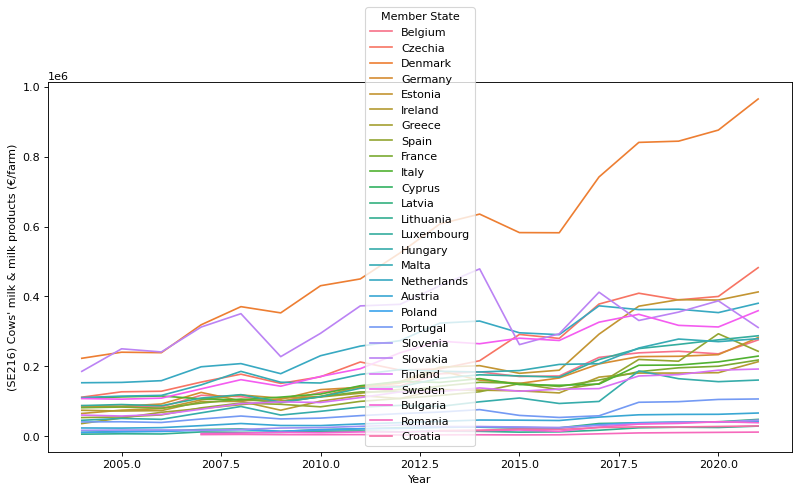

In [27]:
figure(figsize=(12, 6), dpi=80)
sns.lineplot(x="Year", y="(SE216) Cows' milk & milk products (€/farm)", hue="Member State", data=dairy_ag_df)


In [28]:
# Create a Dash app to visualise Dairy output for european member states over time

app = Dash(__name__)

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id="metric",
            options=dairy_ag_df.columns.tolist(),
            value="(SE085) Dairy cows (LU)",
        ),
    ],  style={'width': '30%', 'display': 'inline-block', "backgroundColor": "white"}),
    html.Div([
            dcc.Checklist(
                id="states",
                options=dairy_ag_df['Member State'].unique(),
                value=dairy_ag_df['Member State'].unique(),
            ),
        ], style={'width': '10%', 'float': 'left', 'display': 'inline-block', "backgroundColor": "white"}),
    html.Div([
            dcc.Graph(id="line-graph"),
    ],  style={'width': '90%', 'float': 'right', 'display': 'inline-block'}),
], style={"backgroundColor": "white"})


@app.callback(
    Output("line-graph", "figure"), 
    Input("metric", "value"),
    Input("states", "value"),
)
def update_line_chart(metric, states):
    data  = dairy_ag_df[dairy_ag_df['Member State'].isin(states)]
    fig = px.line(data, x="Year", y=metric, color='Member State', title=f"Dairy {metric}")
    return fig


app.run_server(debug=True, port=8063)

In [29]:
dairy_ag_df.head()

,Year,Member State,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE022) Share of OGA work /AWU (%),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed assets (€),"(SE446) Land, permanent crops & quotas (€)",(SE450) Buildings (€),(SE455) Machinery and equipment (€),(SE460) Breeding livestock (€),(SE465) Total current assets (€),(SE470) Non-breeding livestock (€),(SE475) Stock of agricultural products (€),(SE476) Inventories (€),(SE480) Other circulating capital (€),(SE485) Total liabilities (€),(SE490) Long & medium-term loans (€),(SE495) Short-term loans (€),(SE501) Net worth (€),(SE506) Change in net worth (€),(SE510) Average farm capital (€),(SE516) Gross Investment on fixed assets (€),(SE521) Net Investment on fixed assets (€),(SE526) Cash Flow 1 (€),(SE530) Cash Flow 2 (€),(SE532) Cash flow / farm total capital (€),(SE600) Balance current subsidies & taxes (€),(SE605) Total subsidies - excluding on investments (€),(SE606) Total direct payments (€),(SE611) Compensatory payments/area payments (€),(SE612) Set aside premiums (€),(SE615) Total subsidies on livestock (€),(SE616) Subsidies dairying (€),(SE618) Subsidies sheep & goats (€),(SE621) Environmental subsidies (€),(SE622) LFA subsidies (€),(SE623) Other rural development payments (€),(SE624) Total support for rural development (€),(SE625) Subsidies on intermediate consumption (€),(SE626) Subsidies on external factors (€),(SE630) Decoupled payments (€),(SE631) Single Farm payment (€),(SE632) Single Area payment (€),(SE640) Additional aid (€),(SE650) Support_Art68 (€),(SE699) Other subsidies (€),(SE700) Total OGA output (€/farm),(SE720) Contractual work services (€),(SE725) Agritourism (€),(SE750) Total specific costs for OGA (€),(SE447) Agricultura

In [30]:
land_use_columns = ['(SE028) Permanent grassland (ha)', '(SE026) Arable land (ha)', '(SE027) Permanent crops (ha)']

pie_chart_data_all = dairy_ag_df[['Year', 'Member State'] + land_use_columns]
pie_chart_data_all_melted = pie_chart_data_all.melt(id_vars=['Year', 'Member State'], var_name='Land Use', value_name='Area (ha)')
pie_chart_data_all_melted

,Year,Member State,Land Use,Area (ha)
0,2004,Belgium,(SE028) Permanent grassland (ha),23.99
1,2004,Czechia,(SE028) Permanent grassland (ha),113.32
2,2004,Denmark,(SE028) Permanent grassland (ha),9.07
3,2004,Germany,(SE028) Permanent grassland (ha),29.53
4,2004,Estonia,(SE028) Permanent grassland (ha),61.43
...,...,...,...,...
1408,2021,Romania,(SE027) Permanent crops (ha),0.03
1409,2021,Slovenia,(SE027) Permanent crops (ha),0.13
1410,2021,Slovakia,(SE027) Permanent crops (ha),0.11
1411,2021,Finland,(SE027) Permanent crops (ha),0.00


#### Dashboard Component 1: Pie Chart for Land Use

In [31]:
# Assuming dairy_ag_df is a pandas DataFrame and 'Year' is the column with the years
min_year = dairy_ag_df['Year'].min()
max_year = dairy_ag_df['Year'].max()

# Create a DIV that will be used in the Dash App Layout. This is DIV for Member State Comparison (4 member states at a time) based on Land Use
member_state_comparison_div = (
        html.Div([
        # Header for the app
        html.H4('Member State Comparison'),

        # Dropdown for selecting the column to be used for the names
        html.Div([
            html.Div([
                dcc.Dropdown(id='country1',
                    options=dairy_ag_df['Member State'].unique(),
                    value='Ireland', clearable=False
                ),
            ], style={'width': '25%'}),
            html.Div([
                dcc.Dropdown(id='country2',
                    options=dairy_ag_df['Member State'].unique(),
                    value='Denmark', clearable=False
                ),
            ], style={'width': '25%'}),
            html.Div([
                dcc.Dropdown(id='country3',
                    options=dairy_ag_df['Member State'].unique(),
                    value='Lithuania', clearable=False
                ),
            ], style={'width': '25%'}),
            html.Div([
                dcc.Dropdown(id='country4',
                    options=dairy_ag_df['Member State'].unique(),
                    value='Latvia', clearable=False
                ),
            ], style={'width': '25%'}),
        ], style={'display': 'flex', 'flex-direction': 'row'}),

        # Slider for selecting the year. ONE year will be selected and results for just that year will be shown. 
        html.Div([
            dcc.Slider(
                id='year-slider',
                min=min_year,
                max=max_year,
                value=min_year,
                step=1,
                marks={year: str(year) for year in range(min_year, max_year+1)},
                included=False, # To only show ONE value and not the whole slider from start to finish
            )
        ], style={'padding-top': '5px', 'padding-bottom': '5px '}),

        dcc.Graph(id="pie-graph"),
    ])
)

#### Dashboard Component 2: Geoplot for comparison of different metrics

In [32]:
# geo_d = dairy_ag_df[['Year', 'Member State', 'national_milk_production_tonnes']]
# country_codes = pd.read_csv('data/country_codes.tsv', sep='\t')
# geo_d = geo_d.merge(country_codes, left_on='Member State', right_on='Country', how='left')
# geo_d.rename(columns={'Alpha-3 code': 'country_code'}, inplace=True)
# geo_d

# This is a DIV for Geo Comparison based on the selected column
per_column_geo_div = (
        html.Div([
        # Header for the app
        html.H4('Member State Comparison'),

        # Dropdown for selecting the column to be used for the names
        html.Div([
            html.Div([
                dcc.Dropdown(id='column',
                    options=dairy_ag_df.columns.tolist(),
                    value='national_milk_production_tonnes', 
                    clearable=False
                ),
            ], style={'width': '50%'}),
        ], style={'display': 'flex', 'flex-direction': 'row'}),

        dcc.Graph(id="geo-graph"),
    ])
)

# Read In Country Codes to be used for PLotly Choropleth, and merge them into our base dataframe - dairy_ag_df
country_codes = pd.read_csv('data/country_codes.tsv', sep='\t')
country_codes = country_codes[['Country', 'Alpha-3 code']]
country_codes.rename(columns={'Country': 'Member State'}, inplace=True)

dairy_ag_df = dairy_ag_df.merge(country_codes, on='Member State', how='left')
dairy_ag_df.rename(columns={'Alpha-3 code': 'country_code'}, inplace=True)

dairy_ag_df.head(2)

,Year,Member State,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE022) Share of OGA work /AWU (%),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed assets (€),"(SE446) Land, permanent crops & quotas (€)",(SE450) Buildings (€),(SE455) Machinery and equipment (€),(SE460) Breeding livestock (€),(SE465) Total current assets (€),(SE470) Non-breeding livestock (€),(SE475) Stock of agricultural products (€),(SE476) Inventories (€),(SE480) Other circulating capital (€),(SE485) Total liabilities (€),(SE490) Long & medium-term loans (€),(SE495) Short-term loans (€),(SE501) Net worth (€),(SE506) Change in net worth (€),(SE510) Average farm capital (€),(SE516) Gross Investment on fixed assets (€),(SE521) Net Investment on fixed assets (€),(SE526) Cash Flow 1 (€),(SE530) Cash Flow 2 (€),(SE532) Cash flow / farm total capital (€),(SE600) Balance current subsidies & taxes (€),(SE605) Total subsidies - excluding on investments (€),(SE606) Total direct payments (€),(SE611) Compensatory payments/area payments (€),(SE612) Set aside premiums (€),(SE615) Total subsidies on livestock (€),(SE616) Subsidies dairying (€),(SE618) Subsidies sheep & goats (€),(SE621) Environmental subsidies (€),(SE622) LFA subsidies (€),(SE623) Other rural development payments (€),(SE624) Total support for rural development (€),(SE625) Subsidies on intermediate consumption (€),(SE626) Subsidies on external factors (€),(SE630) Decoupled payments (€),(SE631) Single Farm payment (€),(SE632) Single Area payment (€),(SE640) Additional aid (€),(SE650) Support_Art68 (€),(SE699) Other subsidies (€),(SE700) Total OGA output (€/farm),(SE720) Contractual work services (€),(SE725) Agritourism (€),(SE750) Total specific costs for OGA (€),(SE447) Agricultura

In [33]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px


app = Dash(__name__)

app.layout = html.Div([

    # Dashboard Component One - Member State Comparison
    member_state_comparison_div,

    # Dashboard Component Two - Geo Map Animated
    per_column_geo_div,

], style={'backgroundColor': 'white', 'padding': '3px'})


@app.callback( # Watching for changes in the dropdowns
    Output("pie-graph", "figure"), 
    Input("country1", "value"), 
    Input("country2", "value"),
    Input("country3", "value"),
    Input("country4", "value"), 
    Input("year-slider", "value") # Watching for changes in the slider
    )
# THIS FUNCTION WILL BE CALLED WHENEVER THE DROPDOWNS OR SLIDER CHANGES 
def generate_chart(country1, country2, country3, country4, year_slider): # Function to generate the chart when the changes are made to the inputs, hemce duplicating the input values in the function signature
    d = pie_chart_data_all_melted[(pie_chart_data_all_melted['Member State'].isin([country1, country2, country3, country4])) & (pie_chart_data_all_melted['Year'] == year_slider)]
    
    fig = px.pie(d, values='Area (ha)', names='Land Use', hole=.3, facet_col='Member State')
    fig.update_traces(textposition='inside', textinfo='percent')

    return fig


@app.callback( # Watching for changes in the dropdowns
    Output("geo-graph", "figure"), 
    Input("column", "value"), 
    )
# THIS FUNCTION WILL BE CALLED WHENEVER THE DROPDOWN FOR COLUMN CHANGES
def generate_geo_map(column): # Function to generate the chart when the changes are made to the inputs, hemce duplicating the input values in the function signature
    fig = px.choropleth(dairy_ag_df,
                        locations="country_code", 
                        color=column, 
                        hover_name="Member State", # column to display in hover information
                        animation_frame="Year", # column on which to animate
                        scope='europe', # set the scope to europe
                        color_continuous_scale=px.colors.sequential.Mint,
                        width=1000,
                        height=1000,
                        )

    # This is to ensure the scale is set for the whole animation
    fig.update_layout(
        coloraxis=dict(cmin=dairy_ag_df[column].min(), cmax=dairy_ag_df[column].max())
    )
    # This is to slow down the playback for the animation
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
    return fig


app.run_server(debug=True, port=8072)

#### Correlation Matrix

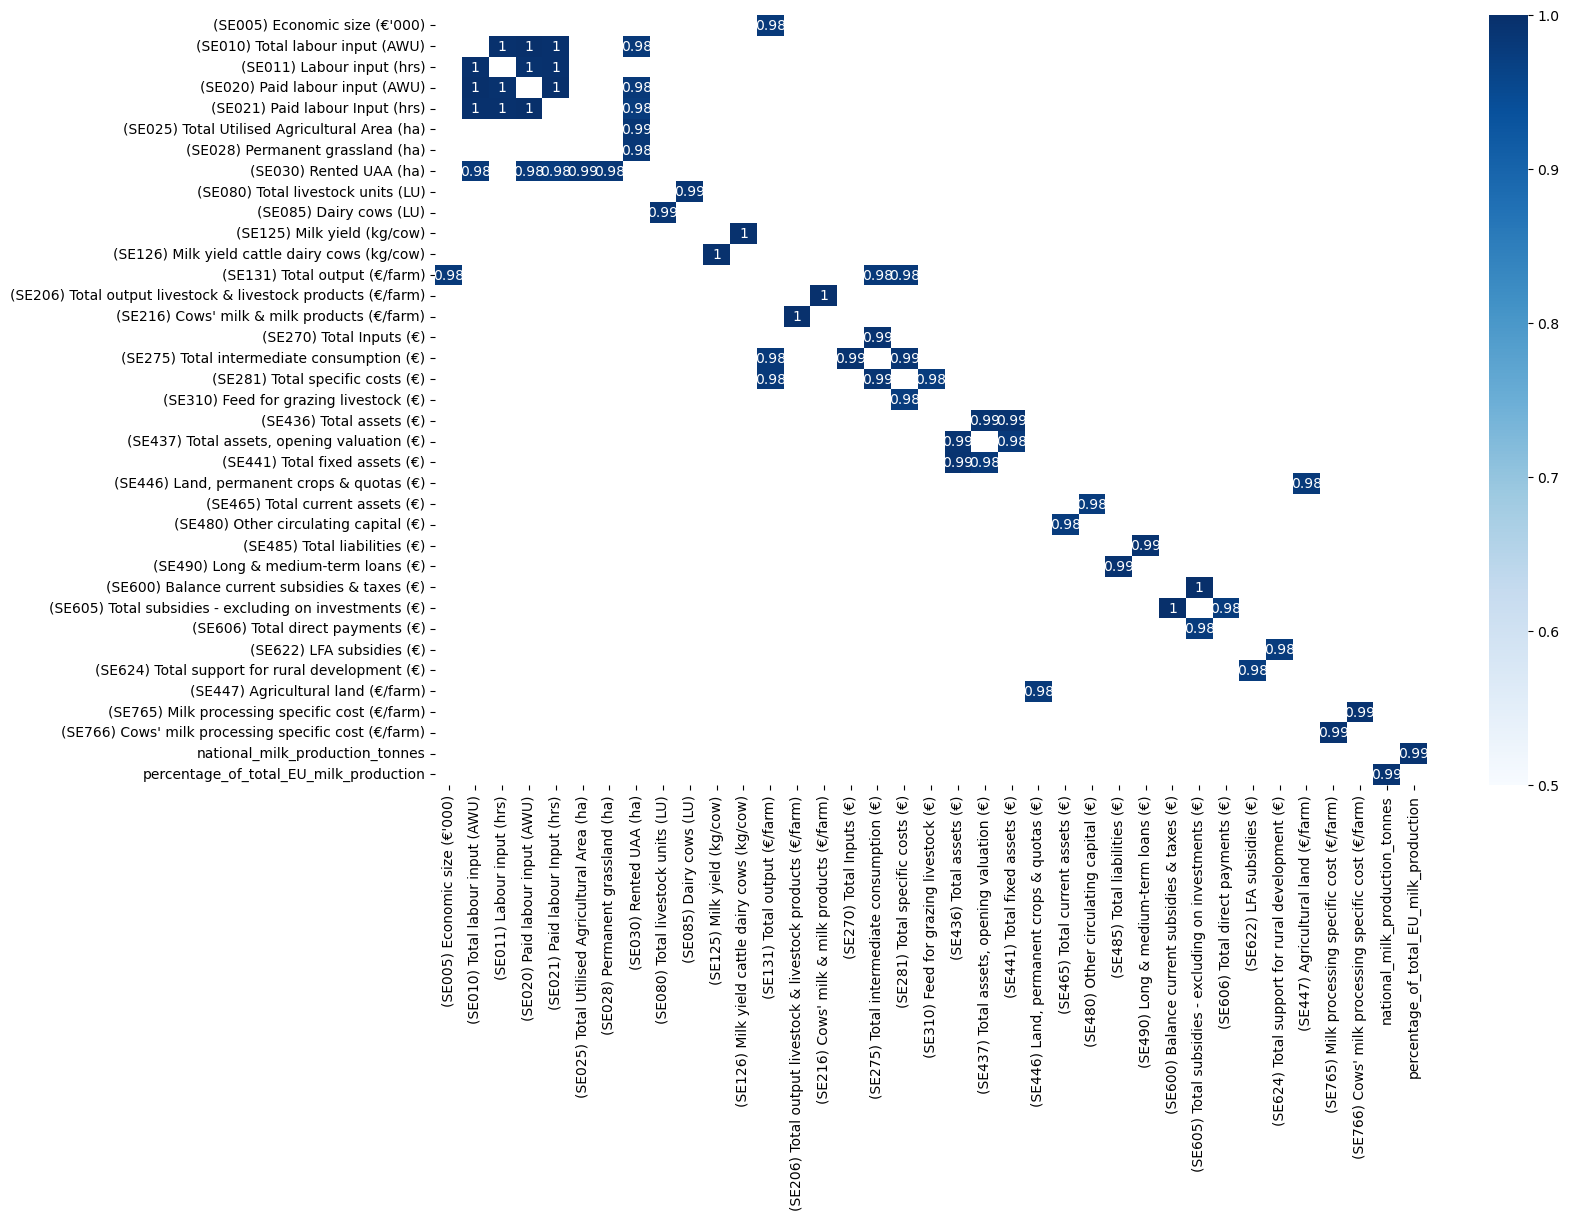

In [34]:
# Create a correlation matrix
corr_matrix = dairy_ag_df.select_dtypes(include=['float64', 'int64']).corr()

# Filter the matrix to only show correlations above 0.5
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.975) & (corr_matrix < 1)].dropna(how='all').dropna(axis=1, how='all')

# Plot the heatmap
fig, ax = pyplot.subplots(figsize=(16, 10))
sns.heatmap(filtered_corr_matrix, cmap="Blues", annot=True, vmin=0.5, vmax=1, ax=ax);

#### Data preparation: Imputing, Scaling, Encoding Y Labels

In [35]:
# Create an imputer object with a strategy of 'median'
imputer = SimpleImputer(strategy='median')

dairy_ag_df_imputed = dairy_ag_df.copy()

# Iterate over all NUMERIC columns in the dataframe
for column in dairy_ag_df.select_dtypes(include=['float64', 'int64']).columns:
    # Fit the imputer on the column
    dairy_ag_df_imputed[column]  = imputer.fit_transform(dairy_ag_df[[column]])


# Verify missing values
missing_values = dairy_ag_df_imputed.isna().sum()
# Print the number of missing values in each column
columns_with_missing_values = missing_values[missing_values > 0].index
print(columns_with_missing_values)

Index(['country_code'], dtype='object')


In [36]:
dairy_ag_df_imputed.head()

,Year,Member State,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE022) Share of OGA work /AWU (%),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed assets (€),"(SE446) Land, permanent crops & quotas (€)",(SE450) Buildings (€),(SE455) Machinery and equipment (€),(SE460) Breeding livestock (€),(SE465) Total current assets (€),(SE470) Non-breeding livestock (€),(SE475) Stock of agricultural products (€),(SE476) Inventories (€),(SE480) Other circulating capital (€),(SE485) Total liabilities (€),(SE490) Long & medium-term loans (€),(SE495) Short-term loans (€),(SE501) Net worth (€),(SE506) Change in net worth (€),(SE510) Average farm capital (€),(SE516) Gross Investment on fixed assets (€),(SE521) Net Investment on fixed assets (€),(SE526) Cash Flow 1 (€),(SE530) Cash Flow 2 (€),(SE532) Cash flow / farm total capital (€),(SE600) Balance current subsidies & taxes (€),(SE605) Total subsidies - excluding on investments (€),(SE606) Total direct payments (€),(SE611) Compensatory payments/area payments (€),(SE612) Set aside premiums (€),(SE615) Total subsidies on livestock (€),(SE616) Subsidies dairying (€),(SE618) Subsidies sheep & goats (€),(SE621) Environmental subsidies (€),(SE622) LFA subsidies (€),(SE623) Other rural development payments (€),(SE624) Total support for rural development (€),(SE625) Subsidies on intermediate consumption (€),(SE626) Subsidies on external factors (€),(SE630) Decoupled payments (€),(SE631) Single Farm payment (€),(SE632) Single Area payment (€),(SE640) Additional aid (€),(SE650) Support_Art68 (€),(SE699) Other subsidies (€),(SE700) Total OGA output (€/farm),(SE720) Contractual work services (€),(SE725) Agritourism (€),(SE750) Total specific costs for OGA (€),(SE447) Agricultura

In [37]:
Y_labels = dairy_ag_df_imputed['Member State']
X_features = dairy_ag_df_imputed.drop(columns=['Member State', 'country_code'])

In [38]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler and transform the features
X_features_scaled = scaler.fit_transform(X_features)

# The result is a numpy array, convert it back to a dataframe
X_features = pd.DataFrame(X_features_scaled, columns=X_features.columns)

In [39]:
X_features_scaled

array([[-1.68639994, -0.28524157, -0.36196158, ...,  0.71064856,
        -0.29008959, -0.36268413],
       [-1.68639994,  0.1040209 ,  1.22136542, ...,  0.32332404,
         0.0425926 , -0.63573809],
       [-1.68639994,  0.63199845, -0.29167826, ..., -1.45072514,
        -0.28139051,  0.12342136],
       ...,
       [ 1.61587551,  1.87451997,  2.33808927, ...,  0.66165598,
         1.00644331, -0.3676602 ],
       [ 1.61587551,  0.12337649, -0.24091809, ..., -1.70570632,
        -0.27226042, -0.3676602 ],
       [ 1.61587551,  1.82075444, -0.12768385, ..., -1.1568132 ,
        -0.20602137, -0.3676602 ]])

In [40]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder and transform the labels
Y_labels_encoded = le.fit_transform(Y_labels)

# The result is a numpy array, convert it back to a pandas Series
Y_labels = pd.Series(Y_labels_encoded, name=Y_labels.name)

In [41]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!
# THIS IS WHERE THE BELOW IS COMING FROM

# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
# https://erdogant.github.io/pca/pages/html/Examples.html

# Dataset 2 PCA/Clustering

### PCA

#### In order to determin the number of principal components....

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [128] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [128] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[29]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
       PC feature   loading  type
0     PC1      34  0.136667  best
1     PC2      66  0.204214  best
2     PC3     118  0.242019  best
3     PC4     125 -0.348477  best
4     PC5      57  0.314586  best
..    ...     ...       ...   ...
131   PC3     121  0.218914  weak
132 

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 29 Principal Components explain [95.62%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

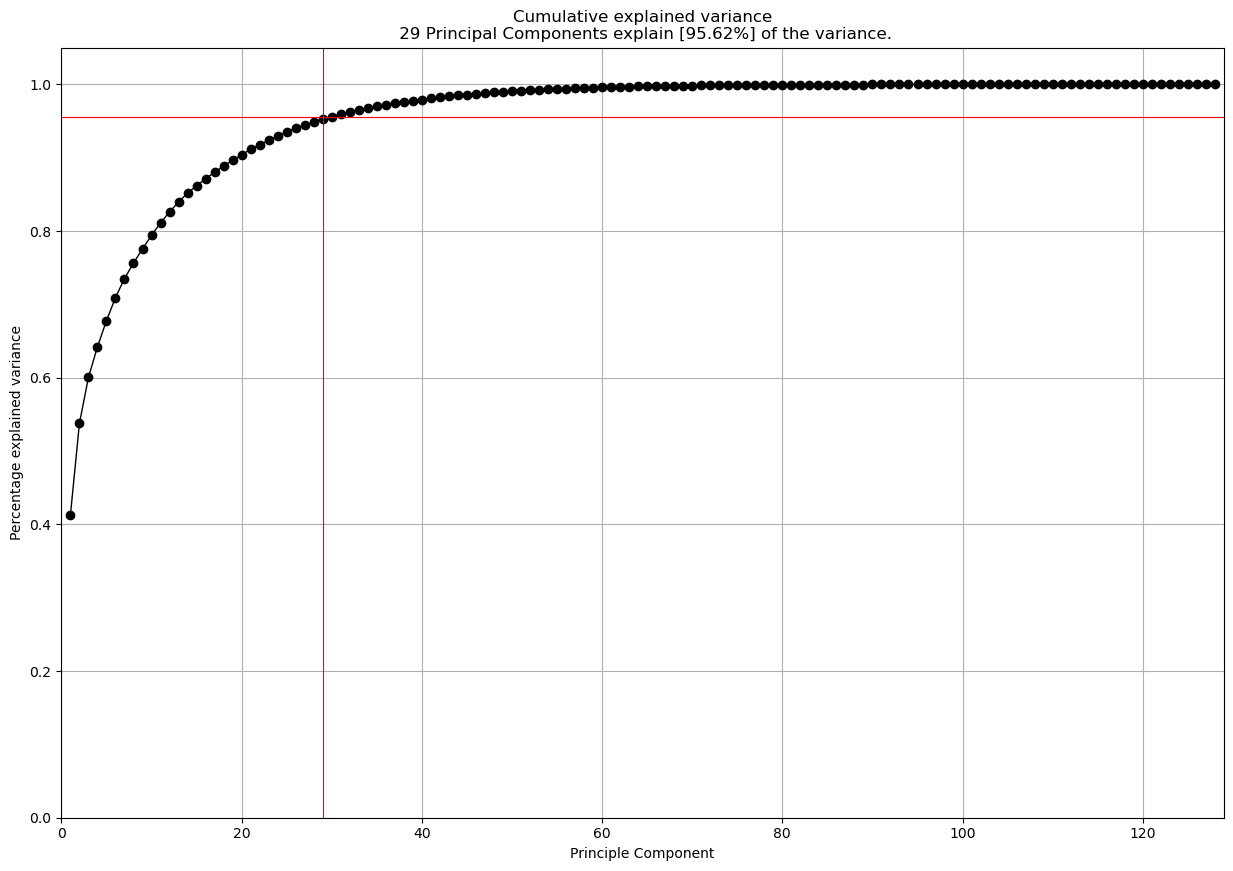

In [42]:
VARIANCE_THRESHOLD = 0.95

# Initialize
pca_model = pca(n_components=VARIANCE_THRESHOLD)
# Fit transform
pca_output = pca_model.fit_transform(X_features_scaled)

# Print the top features. The results show that f1 is best, followed by f2 etc
print(pca_output['topfeat'])
pca_model.plot()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


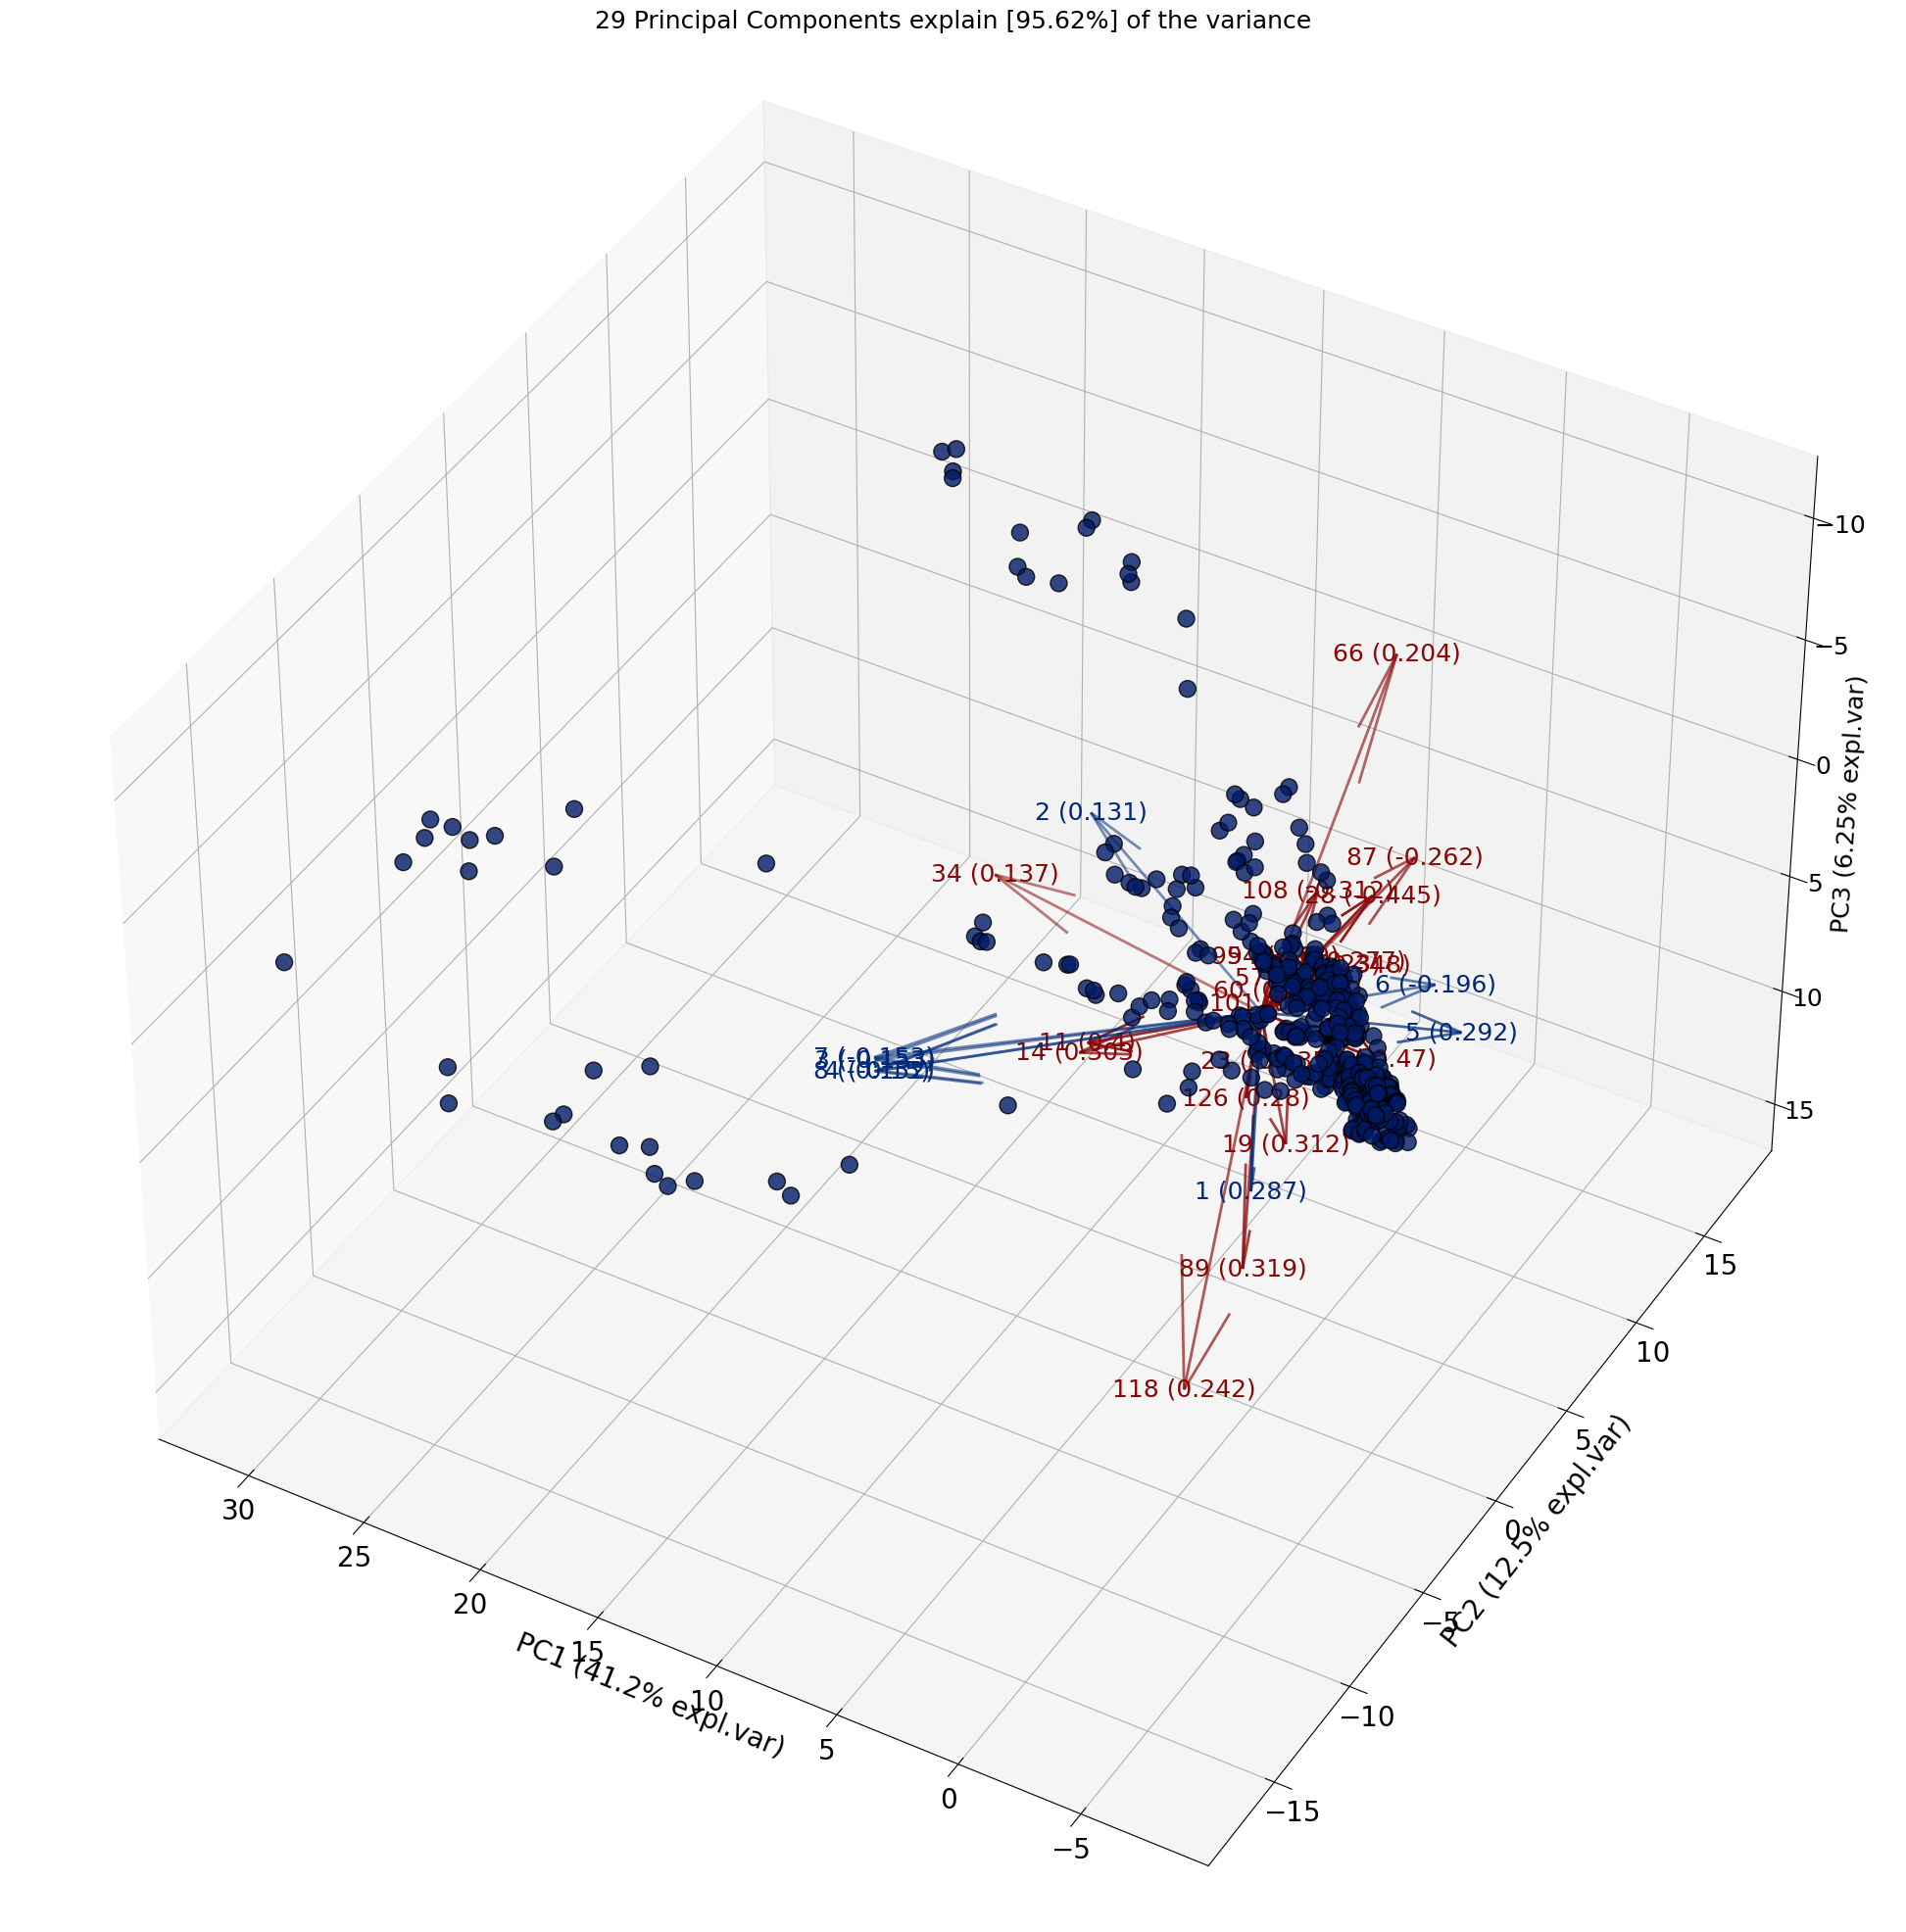

In [43]:
#ax = pca_model.biplot(n_feat=12 , legend=True)

ax = pca_model.biplot3d(n_feat=29, legend=False)


## K-Means Clustering

#### Using Skicit Learn libraries for feature seelction and subsequent k-means clustering

In [44]:
  
# Importing PCA 
NUM_COMPONENTS_TO_KEEP = 29

pca_scikit_model = PCA(n_components = NUM_COMPONENTS_TO_KEEP)
pca_scikit_model.fit(X_features_scaled)

X_features_pca = pca_scikit_model.transform(X_features_scaled)

PCA(n_components=29)

In [45]:
X_features_scaled.shape # initial dataframe with ALL features
X_features_pca.shape # PCA selected 28 of them that account for the most variance (Threshhold adjusted in  the first run of non-scikitlearn PCA)

(471, 128)

(471, 29)

In [46]:
pca_scikit_model.components_

array([[ 0.03314168,  0.13062222,  0.1011403 , ..., -0.01196737,
         0.02585072, -0.0074841 ],
       [ 0.05023395,  0.06638233, -0.15312694, ..., -0.03176968,
        -0.02470681,  0.08219223],
       [ 0.14781168, -0.00946626, -0.0499581 , ...,  0.01725683,
        -0.01029177, -0.01111407],
       ...,
       [-0.0656865 ,  0.01658514,  0.05339248, ..., -0.00099008,
         0.02640695, -0.00893871],
       [ 0.2159517 , -0.02291464, -0.0041794 , ...,  0.17444706,
         0.00327652, -0.07556983],
       [ 0.11134127,  0.01071924,  0.03034265, ...,  0.14623219,
         0.02851963, -0.01650192]])

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'First Principal Component')

Text(0, 0.5, 'Second Principal Component')

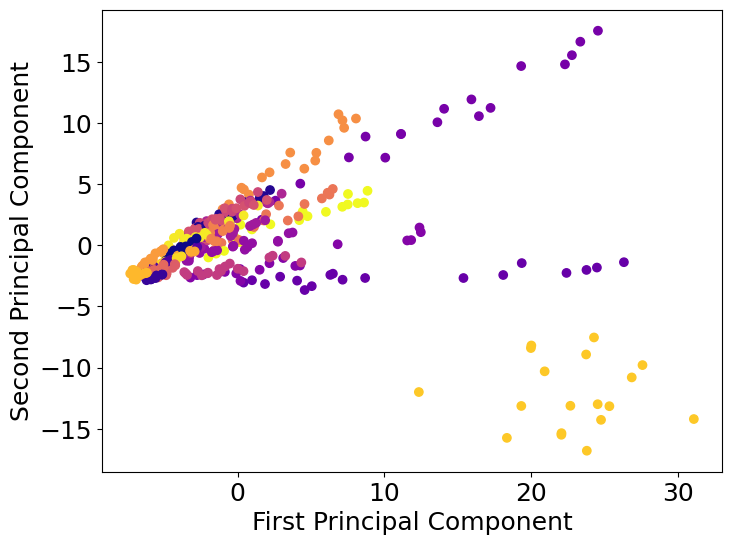

In [47]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(X_features_pca[:, 0], X_features_pca[:, 1], c = Y_labels, cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [48]:
pca_scikit_model.components_, pca_scikit_model.explained_variance_ratio_

(array([[ 0.03314168,  0.13062222,  0.1011403 , ..., -0.01196737,
          0.02585072, -0.0074841 ],
        [ 0.05023395,  0.06638233, -0.15312694, ..., -0.03176968,
         -0.02470681,  0.08219223],
        [ 0.14781168, -0.00946626, -0.0499581 , ...,  0.01725683,
         -0.01029177, -0.01111407],
        ...,
        [-0.0656865 ,  0.01658514,  0.05339248, ..., -0.00099008,
          0.02640695, -0.00893871],
        [ 0.2159517 , -0.02291464, -0.0041794 , ...,  0.17444706,
          0.00327652, -0.07556983],
        [ 0.11134127,  0.01071924,  0.03034265, ...,  0.14623219,
          0.02851963, -0.01650192]]),
 array([0.41270184, 0.12507495, 0.06255405, 0.041651  , 0.03588728,
        0.03137712, 0.02596527, 0.02110033, 0.01944178, 0.01831413,
        0.01712679, 0.01490217, 0.01366603, 0.01198829, 0.00996766,
        0.00963563, 0.00890355, 0.00840806, 0.00792077, 0.0075564 ,
        0.00738331, 0.00635341, 0.00608951, 0.00573555, 0.00552144,
        0.00496504, 0.00429839, 0

In [49]:
# In order to do so, we run the algorithm with a different number of clusters. 
# Then, we determine the Within Cluster Sum of Squares or WCSS for each solution. Based on the values of the WCSS and an approach known as the Elbow method, 
# we make a decision about how many clusters we’d like to keep.

In [50]:
from sklearn.cluster import KMeans

within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_features_pca)                # build the clustering model with PCA scores (features)
    within_cluster_sum_of_squares.append(kmeans.inertia_)


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

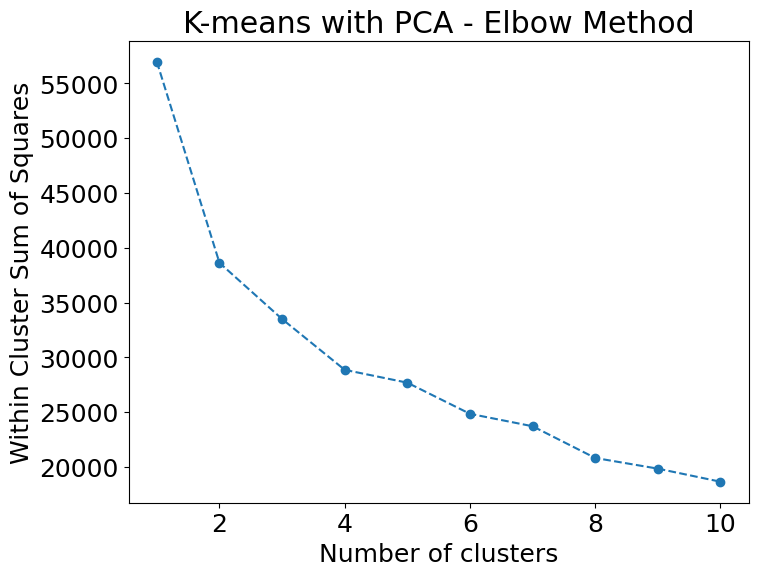

In [51]:
plt.figure(figsize=(8, 6));
plt.plot(range(1, 11), within_cluster_sum_of_squares, marker = 'o', linestyle = '--');
plt.xlabel('Number of clusters');
plt.ylabel('Within Cluster Sum of Squares');
plt.title('K-means with PCA - Elbow Method');
plt.show();

In [52]:
NUM_CLUSTERS = 3

kmeans_pca = KMeans(n_clusters = NUM_CLUSTERS, init = 'k-means++', random_state = 42)
kmeans_pca.fit(X_features_pca)


KMeans(n_clusters=3, random_state=42)

In [53]:
# TODO: Implement grid search for the best parameters for the model

# Random_forest_param_grid = {
#     'n_estimators':[100,200],
#     'max_features':['sqrt', 'log2'], 
#     'max_depth':[100,250,500], 
#     'min_samples_split':[2,5], 
#     'min_samples_leaf':[1,2], 
#     'bootstrap':[True,False],
#     'criterion':['gini','entropy']}

# rf_grid = GridSearchCV(RandomForestClassifier(), Random_forest_param_grid, verbose = 1)
# rf_grid.fit(X_train_route_scaled,y_train_route)
# predict_and_create_CM(rf_grid, X_test_route_scaled, y_test_route, display_label=concatenated_route_quarter_tourism['Route of Travel'].unique())


In [54]:
dairy_ag_df_PCA_kmeans = pd.concat([dairy_ag_df_imputed.reset_index(drop=True), pd.DataFrame(X_features_pca)], axis=1)
dairy_ag_df_PCA_kmeans.columns.values[-NUM_COMPONENTS_TO_KEEP:] = ['Component_' + str(i) for i in range(NUM_COMPONENTS_TO_KEEP)] # Add the PCA components to the dataframe
dairy_ag_df_PCA_kmeans['Predicated_Cluster'] = kmeans_pca.labels_

In [55]:
dairy_ag_df_PCA_kmeans.head()

,Year,Member State,(SE005) Economic size (€'000),(SE010) Total labour input (AWU),(SE011) Labour input (hrs),(SE015) Unpaid labour input (AWU),(SE016) Unpaid labour input (hrs),(SE020) Paid labour input (AWU),(SE021) Paid labour Input (hrs),(SE025) Total Utilised Agricultural Area (ha),(SE026) Arable land (ha),(SE027) Permanent crops (ha),(SE028) Permanent grassland (ha),(SE030) Rented UAA (ha),(SE073) Set aside (ha),(SE074) Total agricultural area out of production (ha),(SE080) Total livestock units (LU),(SE085) Dairy cows (LU),(SE086) Cattle dairy cows (LU),(SE087) Buffalo dairy cows (LU),(SE120) Stocking density (LU/ha),(SE125) Milk yield (kg/cow),(SE126) Milk yield cattle dairy cows (kg/cow),(SE127) Milk yield buffalo dairy cows (kg/cow),(SE131) Total output (€/farm),(SE132) Total output / Total input (ratio),(SE206) Total output livestock & livestock products (€/farm),(SE207) Total livestock output (€/LU),(SE211) Change in value of livestock (€),(SE216) Cows' milk & milk products (€/farm),(SE022) Share of OGA work /AWU (%),(SE256) Other output (€/farm),(SE260) Farmhouse consumption (€),(SE265) Farm use (€),(SE270) Total Inputs (€),(SE275) Total intermediate consumption (€),(SE281) Total specific costs (€),(SE295) Fertilisers (€),(SE296) Fertiliser N (q),(SE297) Fertiliser P2O5 (q),(SE298) Fertiliser K2O (q),(SE309) Specific livestock costs (€/LU),(SE310) Feed for grazing livestock (€),(SE315) Feed for grazing livestock home-grown (€),(SE330) Other livestock specific costs (incl. veterinary expenses) (€/farm),(SE336) Total farming overheads (€),(SE340) Machinery & building current costs (€),(SE345) Energy (€),(SE350) Contract work (€),(SE356) Other direct inputs (€),(SE360) Depreciation (€),(SE365) Total external factors (€),(SE370) Wages paid (€),(SE375) Rent paid (€),(SE380) Interest paid (€),(SE381) Balance of interest paid and received (€),(SE390) Taxes (€),(SE395) VAT balance excluding on investments (€),(SE405) Balance subsidies & taxes on investments (€),(SE406) Subsidies on investments (€),(SE407) Payments to dairy outgoers (€),(SE408) VAT balance on investments (€),(SE409) Subsidies on agricultural investments (€),(SE410) Gross Farm Income (€),(SE415) Farm Net Value Added (€),(SE420) Farm Net Income (€),(SE425) Farm Net Value Added (€/AWU),(SE430) Family Farm Income (€/FWU),(SE436) Total assets (€),"(SE437) Total assets, opening valuation (€)",(SE441) Total fixed assets (€),"(SE446) Land, permanent crops & quotas (€)",(SE450) Buildings (€),(SE455) Machinery and equipment (€),(SE460) Breeding livestock (€),(SE465) Total current assets (€),(SE470) Non-breeding livestock (€),(SE475) Stock of agricultural products (€),(SE476) Inventories (€),(SE480) Other circulating capital (€),(SE485) Total liabilities (€),(SE490) Long & medium-term loans (€),(SE495) Short-term loans (€),(SE501) Net worth (€),(SE506) Change in net worth (€),(SE510) Average farm capital (€),(SE516) Gross Investment on fixed assets (€),(SE521) Net Investment on fixed assets (€),(SE526) Cash Flow 1 (€),(SE530) Cash Flow 2 (€),(SE532) Cash flow / farm total capital (€),(SE600) Balance current subsidies & taxes (€),(SE605) Total subsidies - excluding on investments (€),(SE606) Total direct payments (€),(SE611) Compensatory payments/area payments (€),(SE612) Set aside premiums (€),(SE615) Total subsidies on livestock (€),(SE616) Subsidies dairying (€),(SE618) Subsidies sheep & goats (€),(SE621) Environmental subsidies (€),(SE622) LFA subsidies (€),(SE623) Other rural development payments (€),(SE624) Total support for rural development (€),(SE625) Subsidies on intermediate consumption (€),(SE626) Subsidies on external factors (€),(SE630) Decoupled payments (€),(SE631) Single Farm payment (€),(SE632) Single Area payment (€),(SE640) Additional aid (€),(SE650) Support_Art68 (€),(SE699) Other subsidies (€),(SE700) Total OGA output (€/farm),(SE720) Contractual work services (€),(SE725) Agritourism (€),(SE750) Total specific costs for OGA (€),(SE447) Agricultura

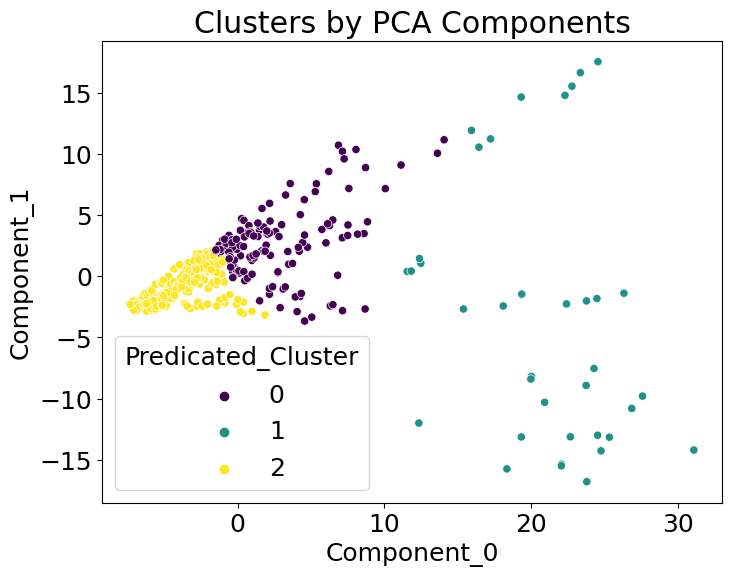

In [56]:
x_axis = dairy_ag_df_PCA_kmeans['Component_0']
y_axis = dairy_ag_df_PCA_kmeans['Component_1']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dairy_ag_df_PCA_kmeans, x=x_axis, y=y_axis, hue=dairy_ag_df_PCA_kmeans['Predicated_Cluster'], palette='viridis')
plt.title('Clusters by PCA Components')
plt.show();

In [57]:
@interact
def show_clusters(cluster=list(range(0, NUM_CLUSTERS)), year=dairy_ag_df_PCA_kmeans['Year'].unique()):
    return dairy_ag_df_PCA_kmeans[(dairy_ag_df_PCA_kmeans['Predicated_Cluster'] == cluster) & (dairy_ag_df_PCA_kmeans.Year == year)][['Member State', "Component_0", "Component_1", "Component_2"]].drop_duplicates().reset_index(drop=True)

interactive(children=(Dropdown(description='cluster', options=(0, 1, 2), value=0), Dropdown(description='year'…

In [58]:
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
dense       gray        haline      ice         matter      solar       speed       tempo
thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
tealrose    temps       tropic      balance     curl        delta       oxy         edge
hsv     

In [59]:
xmin, xmax = min(dairy_ag_df_PCA_kmeans['(SE085) Dairy cows (LU)']), max(dairy_ag_df_PCA_kmeans['(SE085) Dairy cows (LU)'])
ymin, ymax = min(dairy_ag_df_PCA_kmeans['(SE125) Milk yield (kg/cow)']), max(dairy_ag_df_PCA_kmeans['(SE125) Milk yield (kg/cow)'])

xmax += 0.1 * xmax # same as xmax = xmax + 0.1 * xmax
ymax += 0.1 * ymax


fig = px.scatter(dairy_ag_df_PCA_kmeans[dairy_ag_df_PCA_kmeans.Year <= 2021], x="(SE085) Dairy cows (LU)", y="(SE125) Milk yield (kg/cow)",
                 animation_group="Member State", color="Member State", hover_name="Member State",
                 facet_col="Predicated_Cluster", width=1579, height=400, log_x=False, size_max=45, animation_frame="Year", symbol="Member State",
                 range_x=[xmin,xmax], range_y=[ymin,ymax])
fig.show()

In [60]:
# This needs to be done since our clusters are numbers, and we want to use them as strings for Choropleth graph. 
# Providing numbers keeps resulting in Plotly using continuous scale instead of discrete one.
dairy_ag_df_PCA_kmeans['Predicated_Cluster_STR'] = dairy_ag_df_PCA_kmeans.Predicated_Cluster.astype(str)

color_dictionary = dict(
    zip(
        dairy_ag_df_PCA_kmeans['Predicated_Cluster_STR'].unique().tolist(), 
        px.colors.carto.Temps[:NUM_CLUSTERS:3]
        )
)


In [61]:

fig2 = px.choropleth(dairy_ag_df_PCA_kmeans,
                    locations="country_code", 
                    color='Predicated_Cluster_STR', 
                    hover_name="Member State", # column to display in hover information
                    animation_frame="Year", # column on which to animate
                    scope='europe', # set the scope to europe
                    color_discrete_map=color_dictionary,
                    # color_continuous_scale=px.colors.carto.Temps, # set the color scale
                    width=1000,
                    height=1000,
                    )
fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
fig2.show()

# Dairy Sentiment Analysis

In [73]:
from os import getenv, environ
from dotenv import load_dotenv
import pandas as pd
from datetime import datetime as dt
import praw

from praw.models import MoreComments
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import requests
import datetime
import time

from requests.adapters import HTTPAdapter

In [46]:
load_dotenv()

APP_NAME = getenv("APP_NAME")
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
REDDIT_NAME = getenv("REDDIT_NAME")
REDIRECT_URL = "http://localhost:8080"

False

#### Use the Reddit API without any wrappers to performle search on multi-word query. This functionality does not seem to give expected results when using PRAW

##### Step 1: Authenticate

In [47]:
# Gather the data from local environment variables
client_auth = requests.auth.HTTPBasicAuth(APP_ID, APP_SECRET)
post_data = {"grant_type": "client_credentials", 
             "username": APP_ID, 
             "password": APP_SECRET, 
             "redirect_uri": REDIRECT_URL}
headers = {'User-Agent': f'MacOS:{APP_NAME}:v1.0 (by /u/{REDDIT_NAME})'}

# Request the access token
# Token is valid for 1 hour, needs to be refreshed after that
response = requests.post("https://www.reddit.com/api/v1/access_token", auth=client_auth, data=post_data, headers=headers)
access_token = response.json()['access_token']
access_token

KeyError: 'access_token'

##### Step 2: Create a function to get posts based on a query serach / multi-term search

In [ ]:
def url_override(post):
    if 'url_overridden_by_dest' in post:
        return post['url_overridden_by_dest']
    return ''

# Get RAW Response Data from Reddit and det parsed_posts array intp which the data will be stored
def parse_response_data(query_used, res, parsed_posts):
    response_data = res.json()['data']['children']
    for post in response_data:
        print(post['data']['title'])
        parsed_posts.append([
            query_used,
            post['data']['id'],
            post['data']['title'],
            post['data']['subreddit'],
            post['data']['num_comments'],
            post['data']['upvote_ratio'],
            post['data']['selftext'],
            datetime.datetime.fromtimestamp(post['data']['created_utc']).date(),
            url_override(post['data']),
        ]
        )

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
# https://stackoverflow.com/questions/51793254/why-does-python-requests-return-the-same-data-when-issuing-post-in-a-loop-even-a

##### Step 3: Get Posts from Reddit
Traverse a list of subreddits and apply a list of different queries

In [ ]:
headers = {'Authorization': f"bearer {access_token}",
           'User-Agent': f'windows:{APP_NAME}:v1.0 (by /u/{REDDIT_NAME})',
           'Cache-Control': 'no-cache',
           'Connection': 'close'}

SUBREDDITS = ["ireland", "AskIreland", "farming", "dairyfarming", "eu", "europes", "europe", "europeanunion", "europeanparliament", "AskEurope", "nutrition"]

QUERIES = ['dairy AND common agricultural policy', 'dairy AND cap', 'dairy AND price', 'dairy AND quota', 'dairy AND subsidies', 'dairy AND yield', 'dairy AND fertilizer', 'dairy AND ireland', 'dairy AND denmark']

LIMIT=100

print('Will run the following number of options: ', len(SUBREDDITS) * len(QUERIES))

parsed_reddit_posts = []

#res = requests.get(f"https://oauth.reddit.com/r/farming/search/?q=dairy&limit=50&sort=relevance&t=all", headers=headers)
for subreddit in SUBREDDITS:
    for query in QUERIES:
        print('--------------------------------')
        print('QUERYING: ', subreddit, query)
        print('--------------------------------')

        #Call the Reddit API and get the response
        with requests.Session() as s: 
            url = f"https://oauth.reddit.com/r/{subreddit}/search/?q={query}&limit={LIMIT}&sort=relevance&t=all&restrict_sr=on"
            print('SEARCH URL: ', url)

            h = HTTPAdapter(max_retries=2) # Do two retries due to network load / connection instability 
            s.mount('http://', h)
            res = s.get(url, headers=headers)

            # Call out utility function which will only extract the fields we want from the response &
            # store them in the parsed_reddit_posts array
            if res.status_code == 200:
                parse_response_data(query, res, parsed_reddit_posts)
            else:
                print('Request FAILED: ', res.status_code, res.reason)

Will run the following number of options:  99
CPU times: total: 0 ns
Wall time: 0 ns
 --------------------------------
QUERYING:  ireland dairy AND common agricultural policy
--------------------------------
SEARCH URL:  https://oauth.reddit.com/r/ireland/search/?q=dairy AND common agricultural policy&limit=100&sort=relevance&t=all&restrict_sr=on
--------------------------------
QUERYING:  ireland dairy AND cap
--------------------------------
SEARCH URL:  https://oauth.reddit.com/r/ireland/search/?q=dairy AND cap&limit=100&sort=relevance&t=all&restrict_sr=on
Cattle herd size ireland
--------------------------------
QUERYING:  ireland dairy AND price
--------------------------------
SEARCH URL:  https://oauth.reddit.com/r/ireland/search/?q=dairy AND price&limit=100&sort=relevance&t=all&restrict_sr=on
Was charged 1.20 for non dairy milk in a coffee shop this weekend , and 10.20 in total for two coffees. I can’t be the only one thinking this is robbery?
Ben and Jerrys tubs have shrunk. T

         3 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [ ]:
parsed_reddit_posts_df = pd.DataFrame(parsed_reddit_posts, columns=['query_used', 'id', 'title', 'subreddit', 'num_comments', 'upvote_ratio', 'selftext', 'created_utc', 'url_overridden_by_dest'])
parsed_reddit_posts_df.shape

(378, 9)

In [ ]:
@interact
def filter_posts_df(query=QUERIES, subreddit=SUBREDDITS, upvote_ratio=['>= 0.5', '< 0.5']):
    q_s = parsed_reddit_posts_df[(parsed_reddit_posts_df.query_used == query)]
    if upvote_ratio == '>= 0.5':
        return q_s[q_s.upvote_ratio >= 0.5]
    else:
        return q_s[q_s.upvote_ratio < 0.5]

interactive(children=(Dropdown(description='query', options=('dairy AND common agricultural policy', 'dairy AN…

In [ ]:
parsed_reddit_posts_df.to_csv('reddit/crawled_posts.csv', index=False)

#### Use PRAW to get comment for the posts collected above

In [ ]:
reddit = praw.Reddit(
    client_id = APP_ID,
    client_secret = APP_SECRET,
    user_agent = f"{APP_NAME} u/{REDDIT_NAME}"
)
print(reddit.read_only)

True


In [ ]:
def get_all_comments(comment, level, post_id, post_title):
    try:
        comments.append([
            post_id,
            post_title,
            level,
            comment.body,
            comment.likes,
            comment.score,
            comment.subreddit,
        ])
    except Exception as e:
        print(e)

    try:
        if comment.replies:
            for reply in comment.replies:
                get_all_comments(reply, level + 1, post_id, post_title)
    except Exception as e:
        print(e)

comments = []
for post_id in parsed_reddit_posts_df.id:
    submission = reddit.submission(post_id)
    print('Post ID ', submission.id, 'contains ', submission.num_comments, ' comments') # Will be used to validate the resulting dataframes and identify if some comments have been missed

    if submission.num_comments >= 10:
        print('Post has over 10 comments, proceeding to gathering comments...')
        for comment in submission.comments:        
            get_all_comments(comment, level=0, post_id=submission.id, post_title=submission.title)


comments_pd = pd.DataFrame(comments, columns=[
        'post_id',
        'post_title',
        'comment_level',
        'comment_body',
        'comment_likes',
        'comment_score',
        'comment_subreddit',
])
comments_pd.to_csv(f"reddit/crawled_comments.csv", index=False)


Post ID  smq3nh contains  21  comments
Post has over 10 comments, proceeding to gathering comments...
Post ID  16sikmw contains  733  comments
Post has over 10 comments, proceeding to gathering comments...
'MoreComments' object has no attribute 'body'
'MoreComments' object has no attribute 'replies'
'MoreComments' object has no attribute 'body'
'MoreComments' object has no attribute 'replies'
'MoreComments' object has no attribute 'body'
'MoreComments' object has no attribute 'replies'
'MoreComments' object has no attribute 'body'
'MoreComments' object has no attribute 'replies'
'MoreComments' object has no attribute 'body'
'MoreComments' object has no attribute 'replies'
'MoreComments' object has no attribute 'body'
'MoreComments' object has no attribute 'replies'
'MoreComments' object has no attribute 'body'
'MoreComments' object has no attribute 'replies'
'MoreComments' object has no attribute 'body'
'MoreComments' object has no attribute 'replies'
'MoreComments' object has no attri

#### Step 1 - AFTER Data Has Been Gathered

In [52]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [49]:
reddit_posts_df = pd.read_csv('reddit/crawled_posts.csv')
reddit_posts_df.shape

reddit_comments_df = pd.read_csv('reddit/crawled_comments.csv')
reddit_comments_df.shape

(378, 9)

(19912, 7)

In [50]:
reddit_posts_df.head()
reddit_comments_df.head()

,query_used,id,title,subreddit,num_comments,upvote_ratio,selftext,created_utc,url_overridden_by_dest
0,dairy AND cap,smq3nh,Cattle herd size ireland,ireland,21,0.27,So I am wondering what's being done and when a...,2022-02-07,NaN
1,dairy AND price,16sikmw,Was charged 1.20 for non dairy milk in a coffe...,ireland,733,0.87,Myself and the wife will usually head into tow...,2023-09-26,NaN
2,dairy AND price,1334bl3,Ben and Jerrys tubs have shrunk. The price how...,ireland,97,0.95,NaN,2023-04-29,https://i.redd.it/01mmduew0xwa1.jpg
3,dairy AND price,na83fa,Can someone in the dairy explain why adding sa...,ireland,34,0.80,NaN,2021-05-11,https://i.redd.it/vaua7vm66ky61.jpg
4,dairy AND price,136iw5q,Supermarket chains cut price of butter,ireland,30,0.93,NaN,2023-05-03,https://www.rte.ie/news/ireland/2023/0503/1380...


,post_id,post_title,comment_level,comment_body,comment_likes,comment_score,comment_subreddit
0,smq3nh,Cattle herd size ireland,0,Nothing's going to happen any time soon. \n\nN...,NaN,4,ireland
1,smq3nh,Cattle herd size ireland,1,A noble heart debiggens the largest herd.,NaN,3,ireland
2,smq3nh,Cattle herd size ireland,0,Until there is a decrease in demand there will...,NaN,6,ireland
3,smq3nh,Cattle herd size ireland,0,"As a clueless jackeen, all I know is that I lo...",NaN,6,ireland
4,smq3nh,Cattle herd size ireland,1,Beef is delicious alright.,NaN,-1,ireland
